## Business Understanding
## Data Understanding
## Overview


#### Load Data

In [69]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
stroke_df = pd.read_csv('brain_stroke.csv')
stroke_df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [71]:
def load_and_inspect_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Get the shape of the DataFrame
    shape = df.shape
    print("Shape of the DataFrame:", shape)
    
    # Get information about the DataFrame
    print("\nInfo about the DataFrame:")
    df.info()
    
    # Get descriptive statistics of the DataFrame
    print("\nDescriptive statistics of the DataFrame:")
    description = df.describe()
    print(description)
    
    return df

# Example usage:
file_path = 'brain_stroke.csv'
stroke_df = load_and_inspect_data(file_path)


Shape of the DataFrame: (4981, 11)

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB

Descriptive statistics of the DataFrame:
               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.00000

In [72]:
stroke_df.duplicated().sum()

0

In [73]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [74]:
stroke_df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

The dataset is clearly imbalanced 

### Data Visualization

We will start with checking the relationship between the dependent variable and the numerical variables.

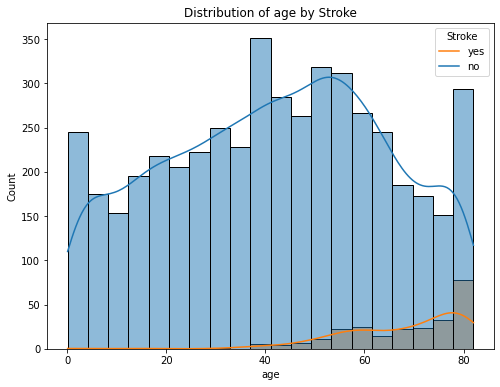

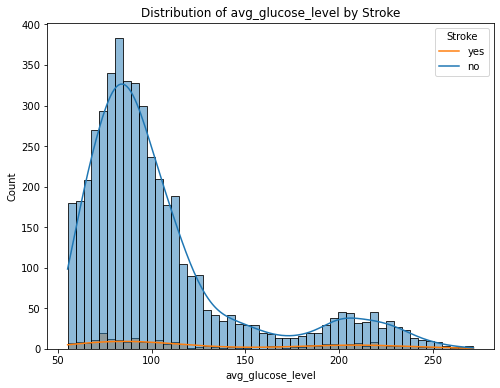

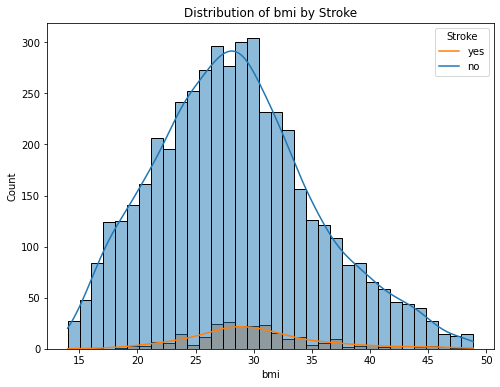

In [75]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
stroke_df_num = stroke_df[numerical_columns + ['stroke']]

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=stroke_df_num, x=col, hue='stroke', kde=True)
    plt.title(f'Distribution of {col} by Stroke')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['yes', 'no'])
    plt.show()


From the above visualizations, its evident that people from the age between 60-80, with bmis between 26-32 are more likely to get a stroke.

### Categorical Variables 
We will check how the categorical variables relate with the dependent variable

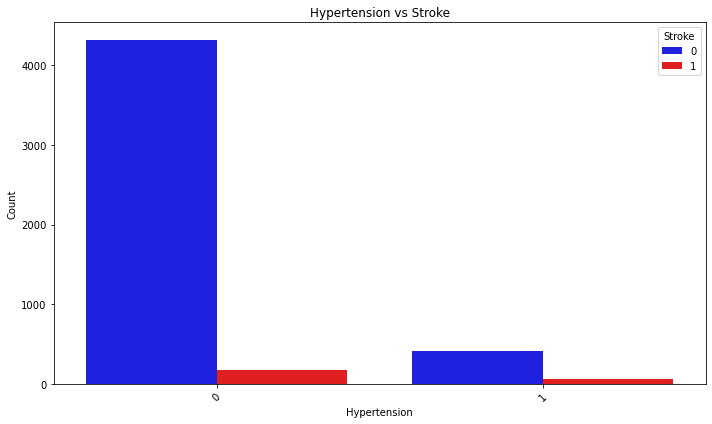

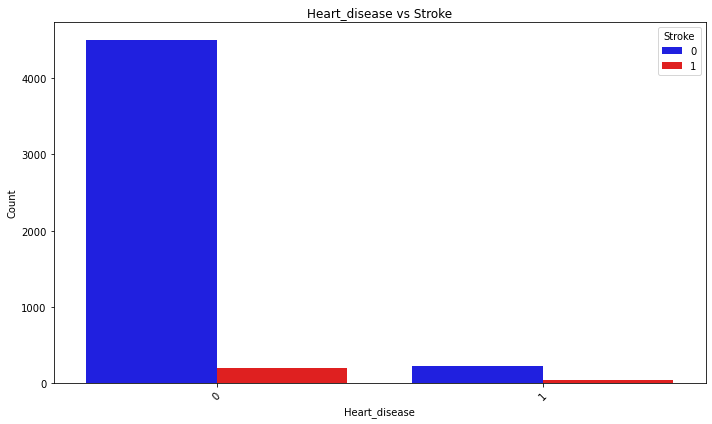

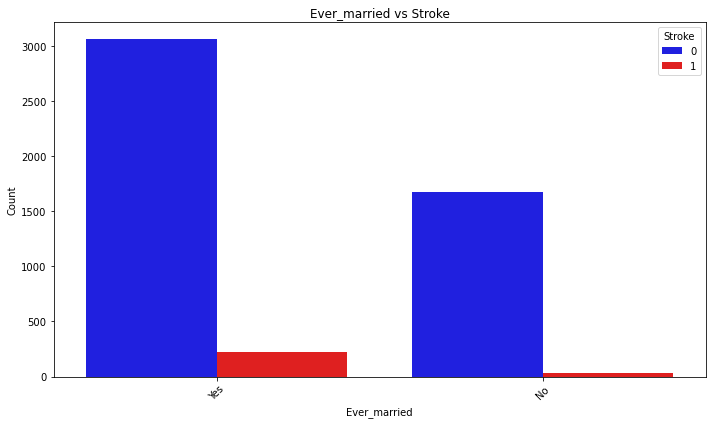

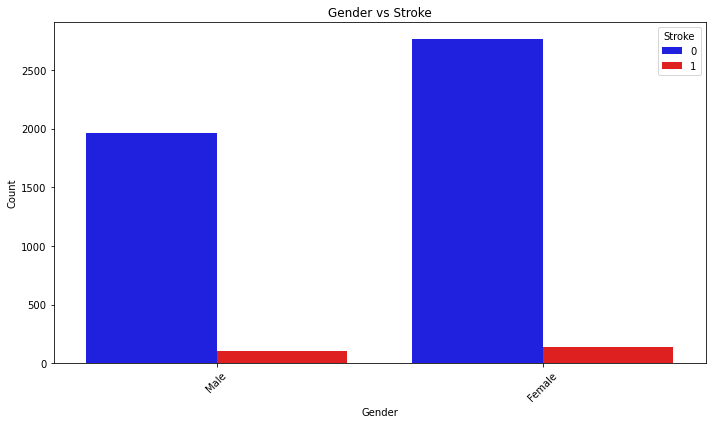

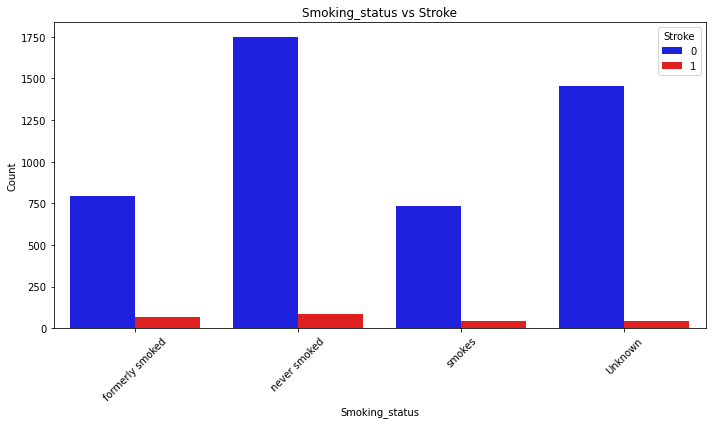

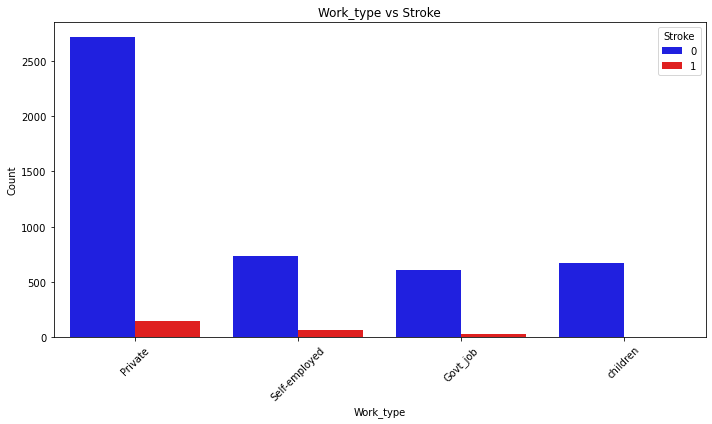

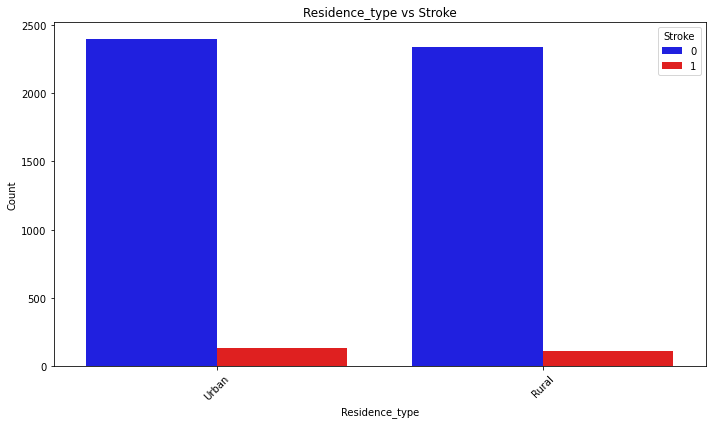

In [76]:
categorical_columns = ['hypertension', 'heart_disease', 'ever_married', 'gender', 'smoking_status', 'work_type', 'Residence_type']

# Set color palette
colors = ['blue', 'red']

# Loop through each categorical column and create a count plot with specified colors
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='stroke', data=stroke_df, palette=colors)
    plt.title(f'{column.capitalize()} vs Stroke')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

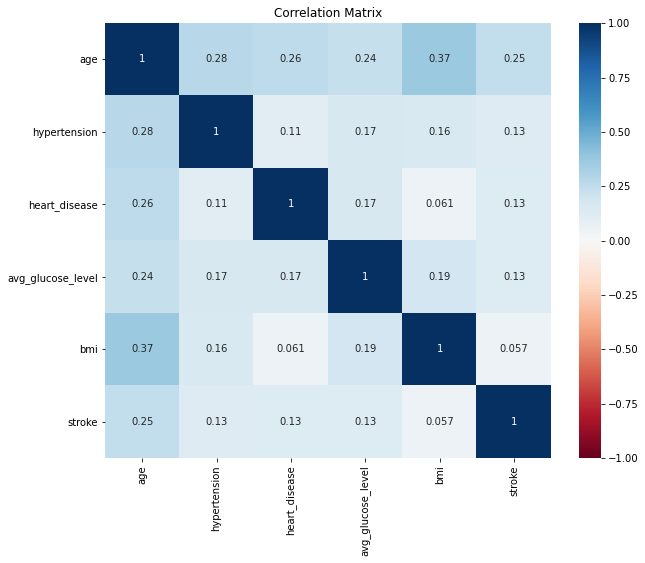

In [77]:
correlation_matrix = stroke_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [78]:
stroke_df = pd.get_dummies(stroke_df, columns=['smoking_status'])

In [79]:
label_encoder = LabelEncoder()
stroke_df['ever_married'] = label_encoder.fit_transform(stroke_df['ever_married'])
stroke_df['gender'] = label_encoder.fit_transform(stroke_df['gender'])

Now I will drop the variables that don't seem relevant 

In [80]:
stroke_df=stroke_df.drop(['work_type'],axis=1)
stroke_df=stroke_df.drop(['Residence_type'],axis=1)

In [81]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0


### Train Test Split

In [82]:
X = stroke_df.drop(['stroke'],axis=1)
y = stroke_df['stroke']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [84]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

### Training the model
I will be using the logistic regression as my baseline model.

In [85]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       935
           1       0.00      0.00      0.00        62

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.88      0.94      0.91       997



c:\Users\NDUTA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix

array([[935,   0],
       [ 62,   0]], dtype=int64)

I'll try balancing the dataset to see the impact but before splitting for indexing purposes

In [87]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = stroke_df[stroke_df.stroke == 0]
df_minority = stroke_df[stroke_df.stroke == 1]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=248,    # to match minority class
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Display the new class counts
print(df_undersampled.stroke.value_counts())

1    248
0    248
Name: stroke, dtype: int64


In [88]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 1798
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          496 non-null    int32  
 1   age                             496 non-null    float64
 2   hypertension                    496 non-null    int64  
 3   heart_disease                   496 non-null    int64  
 4   ever_married                    496 non-null    int32  
 5   avg_glucose_level               496 non-null    float64
 6   bmi                             496 non-null    float64
 7   stroke                          496 non-null    int64  
 8   smoking_status_Unknown          496 non-null    uint8  
 9   smoking_status_formerly smoked  496 non-null    uint8  
 10  smoking_status_never smoked     496 non-null    uint8  
 11  smoking_status_smokes           496 non-null    uint8  
dtypes: float64(3), int32(2), int64(3), 

In [89]:
X = df_undersampled.drop(['stroke'],axis=1)
y = df_undersampled['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y,random_state=1)

In [90]:
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)
y_pred_log2 = logreg2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        50
           1       0.69      0.82      0.75        50

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



c:\Users\NDUTA\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


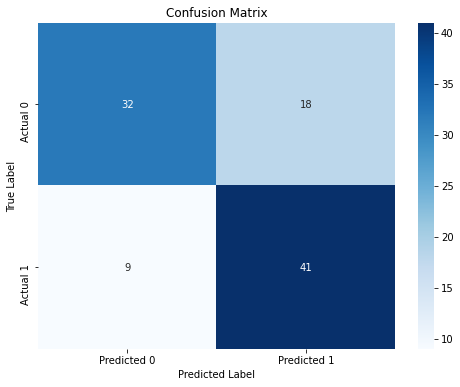

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred_log2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Before undersampling the majority class, the model's accuracy was high but the recall for the minority class was low and this being a medical field model thats not good, But after undersampling even if the accuracy dropped, at least the recall went higher for the minority class meaning it got better at predicting the ones with a risk of getting a brain stroke.

## Decision Tree

In [135]:
clf = DecisionTreeClassifier()
dec_clf = clf.fit(X_train,y_train)
y_pred_dec = dec_clf.predict(X_test)

print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        50
           1       0.69      0.82      0.75        50

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



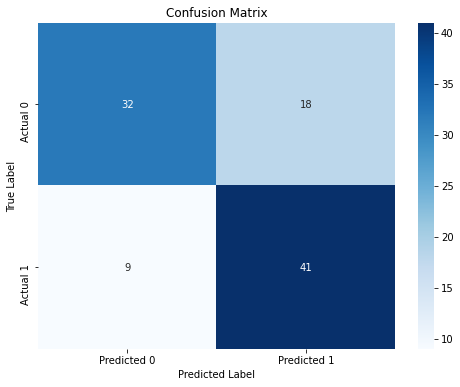

In [136]:
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## KNN 

In [152]:
model = KNeighborsClassifier()
Knn = model.fit(X_train,y_train)
y_pred_knn = Knn.predict(X_test)

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        50
           1       0.72      0.78      0.75        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



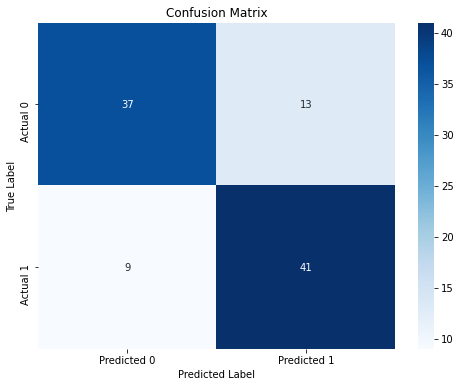

In [137]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## KNN with GridSearchCv

In [151]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'p': [1, 2]  # Distance metric: 1 for Manhattan distance, 2 for Euclidean distance
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred_knn = best_knn.predict(X_test)

# Evaluate the best model
print("Best parameters found:", grid_search.best_params_)
print(classification_report(y_test, y_pred_knn))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s


Best parameters found: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.75      0.84      0.79        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    3.4s finished


## Gaussian Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB(priors=[0.4, 0.6],var_smoothing=1e-9)
model = NB.fit(X_train,y_train)
y_pred_NB = model.predict(X_test)

print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        50
           1       0.70      0.80      0.75        50

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



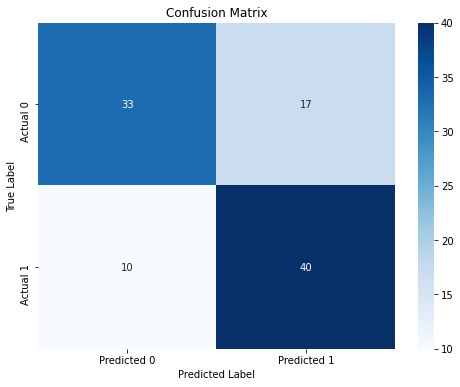

In [150]:
conf_matrix = confusion_matrix(y_test, y_pred_NB)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [153]:
rand = RandomForestClassifier()
model = rand.fit(X_train,y_train)
y_pred_rand = model.predict(X_test)

print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        50
           1       0.71      0.78      0.74        50

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



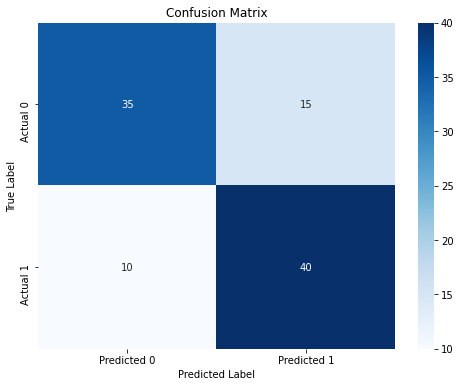

In [134]:
conf_matrix = confusion_matrix(y_test, y_pred_rand)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,y,cv=4)
print(score)
print(np.mean(score)*100)

[0.79032258 0.71774194 0.73387097 0.65322581]
72.37903225806453


## Random Forest with GridSearchCV

In [156]:


# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [20, 30],
    'criterion': ['entropy'],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10],
}

# Create a base model
rf = RandomForestClassifier(random_state=1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

# Predict using the best model
y_pred_rand2 = best_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rand2))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        50
           1       0.69      0.90      0.78        50

    accuracy                           0.75       100
   macro avg       0.77      0.75      0.74       100
weighted avg       0.77      0.75      0.74       100



[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.6s finished


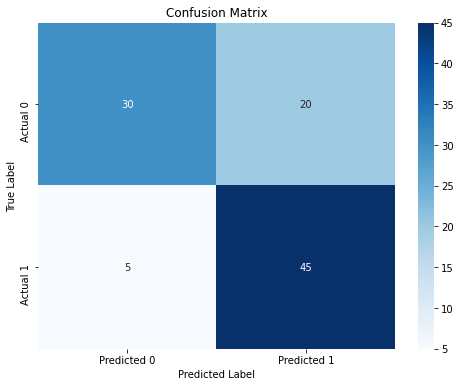

In [157]:
conf_matrix = confusion_matrix(y_test, y_pred_rand2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()